<center><h1>Machine Learning Assignment</h1></center>

<h3>1.	Importing Libraries/Dataset</h3>

<h4>1.a) Importing Libraries</h4>

In [241]:
import pandas as pd
import seaborn as sns

from prettytable import PrettyTable

from matplotlib import pyplot as plt

# import numpy as np
# import pandas as pd
# import seaborn as sns
# from matplotlib import pyplot as plt
# from scipy.stats import skew
# from prettytable import PrettyTable


# For feature selections and Feature Engineering
# from sklearn.model_selection import train_test_split
# from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import LabelEncoder


# Importing the DecisionTreeClassifier and LogisticRegressionClassifier for model building
# from sklearn import tree
# from sklearn.linear_model import LogisticRegression


# For Analyzing the models
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import classification_report
# from sklearn.metrics import f1_score
# from sklearn.metrics import roc_curve, roc_auc_score

<h4>1.b) Importing Dataset</h4>

In [2]:
# Importing Dataset of AmesHousing.csv put at same level as this file
df1 = pd.read_csv('AmesHousing.csv') 

<h3>2.	Data Exploration</h3>

<h4>2.a) Print 2 rows for sanity check</h4>

In [3]:
# Printing 2 rows with .head(2)
df1.head(2)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000


<h4>2.b) Class imbalance with appropriate visualization method</h4>

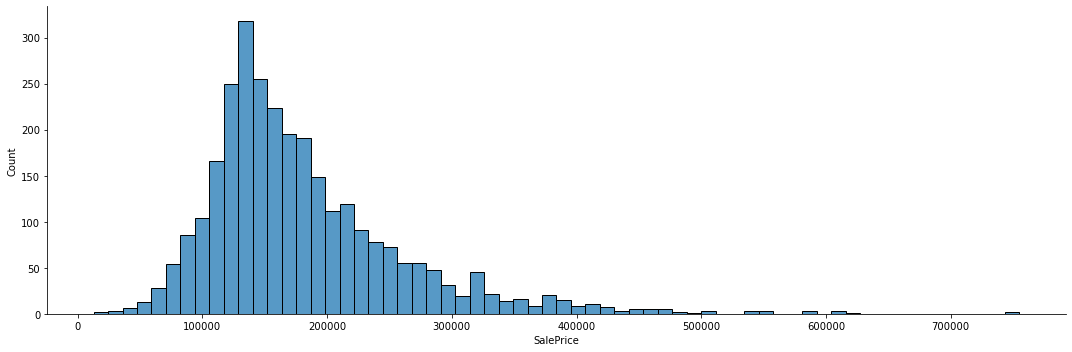

In [4]:
# Plotting Histogram of the class Variable "Sales Price"
sns.displot(df1['SalePrice'], height=5, aspect=3)

In [5]:
# Calculating mean of sales price attribute to assess imbalance
df1["SalePrice"].median()

160000.0

In [33]:
# Calculating median rounded to 2 decimal places of sales price attribute to assess imbalance
round(df1["SalePrice"].mean(), 2)

180796.06

<div><b>Explanation:</b></div>
<div>Above is the histogram plot of the class variable "SalePrice". From the histogram we can infer the fllowing points:</div>
<ol>
    <li>The class variable is left skewed visually from the histogram, means the class ariable has more data favoring the median value</li>
    <li>We cant see groups here, the data is bundled towards single median</li>
    <li>Comparing Mean and Median:</li>
        <ul>
            <li>The Mean value is 180796.06 and the median is 160000.0</li>
            <li>Median is less than mean hence the data is left skewed</li>
        </ul>
    <li>Looking at the histogram we can see outlier values too</li>
</ol>

<h3>3.Data Pre-processing and cleaning</h3>

<h4>3.a) Pre-processing of the data like identifying NULL or Missing Values</h4>

<h5>3.a.1) Exploring data</h4>

- <b>1. Data set Size Analysis: </b> Observing the size of data we get the dataset has 2930 rows and 82 columns or attributes

In [44]:
# Size of Original Data
df1.shape

(2930, 82)

- <b>2. Duplicate Rows Analysis: </b>Trying to figure out if the dataset has duplicate rows, but no duplicates found

In [132]:
# Identify duplicate rows
print("Duplicate Rows :", len(df1[df1.duplicated()]))

Duplicate Rows : 0


- <b>3. Missing Values Count Analysis: </b> Calculating total missing values, NaN values in the data sent, we find the value to be 13,997

In [144]:
df1.isna().sum().sum()

13997

<h5>3.a.2) Identifying Null Values and Missing Values</h5>

- <b>1. Identifying Row missing values: </b>Here we are listing The count of missing values for rowsmissing values</div>

In [203]:
df1.isna().sum().sum()

13997

- <b>2. Identifying Column missing values: </b>Here we are listing The count and percentage of missing values for columns having more than 1% missing values</div>

In [159]:
# Setting to not hide fields if count is more
pd.set_option('display.max_rows', None)

# Count the sum and percentage of missing fields
isNaCount = df1.isna().sum()
isnaPercent = (df1.isna().sum() * 100) / len(df1)

# Displaying the missing values as count and their corresponding % as a dataframe
anlys_dframe = pd.DataFrame({'Count': isNaCount, 'Percentage': round(isnaPercent, 2)})

# Sorting Values in dataframe and showing values where missing % > 1
anlys_dframe = anlys_dframe.sort_values(by='Percentage',ascending=False)
notableisNas = anlys_dframe.loc[anlys_dframe['Percentage'] > 0]

# Dislaying the dataframe neatly
display(notableisNas)

,Count,Percentage
Pool QC,2917,99.56
Misc Feature,2824,96.38
Alley,2732,93.24
Fence,2358,80.48
Fireplace Qu,1422,48.53
Lot Frontage,490,16.72
Garage Cond,159,5.43
Garage Finish,159,5.43
Garage Yr Blt,159,5.43
Garage Qual,159,5.43


-<b>Smoothening Missing Vlaues:</b> Checking the unique values of the attributes to figure out how to fill these. For categorical we can fill by mode values ad for continuous attributes we will fill them by the mean values

In [183]:
# Creating a copy of dataset
# "Lot Frontage", "Garage Yr Blt", "Mas Vnr Area"
dfExplore = df1[["Fireplace Qu", "Garage Cond", "Garage Finish", "Garage Qual", "Garage Type", "Bsmt Exposure", "BsmtFin Type 2", "Bsmt Qual", "Bsmt Cond", "BsmtFin Type 1", "Mas Vnr Type"]].copy()

for column in dfExplore:

        # Lists all coloumns and unique value in them
        print(str(column) + ' : ' + str(dfExplore[column].unique()))

        # Diplays count of each value of the column
        print(dfExplore[column].value_counts())

        print("_________________________________________________________________")

Fireplace Qu : ['Gd' nan 'TA' 'Po' 'Ex' 'Fa']
Gd    744
TA    600
Fa     75
Po     46
Ex     43
Name: Fireplace Qu, dtype: int64
_________________________________________________________________
Garage Cond : ['TA' nan 'Fa' 'Gd' 'Ex' 'Po']
TA    2665
Fa      74
Gd      15
Po      14
Ex       3
Name: Garage Cond, dtype: int64
_________________________________________________________________
Garage Finish : ['Fin' 'Unf' 'RFn' nan]
Unf    1231
RFn     812
Fin     728
Name: Garage Finish, dtype: int64
_________________________________________________________________
Garage Qual : ['TA' nan 'Fa' 'Gd' 'Ex' 'Po']
TA    2615
Fa     124
Gd      24
Po       5
Ex       3
Name: Garage Qual, dtype: int64
_________________________________________________________________
Garage Type : ['Attchd' 'BuiltIn' 'Basment' 'Detchd' nan 'CarPort' '2Types']
Attchd     1731
Detchd      782
BuiltIn     186
Basment      36
2Types       23
CarPort      15
Name: Garage Type, dtype: int64
____________________________

- <b>Observation: </b> 
    1. Form the above exploration, we find that the ""Fireplace Qu", "Garage Cond", "Garage Finish", "Garage Qual", "Garage Type", "Bsmt Exposure", "BsmtFin Type 2", "Bsmt Qual", "Bsmt Cond", "BsmtFin Type 1", "Mas Vnr Type" are categorical fields, hence we need to these by the Mode values as they are categorical variables
    2. "Lot Frontage", "Mas Vnr Area" are area values, hence for the houses that have  missing values in these we will fill by "0" indicating no area
    3. "Garage Yr Blt" values resemble that of the "Year built" column, hence the missing values can be replaced from those in the "Year Built" column assuming the garages are built along with the houses
    4. For the above exploration we observe that columns "Alley", "Misc Feature", "Pool QC", "Fence" has more than 80% missing values, hence it is worth removing these features from the dataset as they wont contribute much to the learning model
    5. For attributes "Bsmt Full Bath", "Bsmt Half Bath", "BsmtFin SF 1", "Garage Cars", "Electrical", "Total Bsmt SF", "Bsmt Unf SF", "BsmtFin SF 2", "Garage Area", figure out the rows that contain missing values in these attributes and delete them

- <b>Actions: </b> 
    1. Drop Columns, "Pool QC", "Misc Feature", "Alley", "Fence" as they contain more than 80% missing values
    2. Smoothen the categorical variables missing values by mode ("Fireplace Qu", "Garage Cond", "Garage Finish", "Garage Qual", "Garage Type", "Bsmt Exposure", "BsmtFin Type 2", "Bsmt Qual", "Bsmt Cond", "BsmtFin Type 1", "Mas Vnr Type")
    3. Fill the attributes having area "Lot Frontage", "Mas Vnr Area" with 0
    4. Fill the missing values in the "Garage Yr Blt" with "Year built"
    5. Delete rows containing missing values for "Bsmt Full Bath", "Bsmt Half Bath", "BsmtFin SF 1", "Garage Cars", "Electrical", "Total Bsmt SF", "Bsmt Unf SF", "BsmtFin SF 2", "Garage Area"

<h5>3.a.2) Cleaning the data</h5>

- 1. Drop Columns, "Pool QC", "Misc Feature", "Alley", "Fence" as they contain more than 80% missing values

In [211]:
dfCleaned = df1.copy()

# Removing columns "Alley", "Misc Feature", "Pool QC", "Fence" having more than 80% missing values, 
dfCleaned.drop(["Alley", "Misc Feature", "Pool QC", "Fence"], axis = 1, inplace =True)


print(dfCleaned.shape)
print(dfCleaned.isna().sum().sum())

(2930, 78)
3166


- 2. Smoothen the categorical variables missing values by mode

In [213]:
dfCleaned["Fireplace Qu"].fillna("Gd", inplace=True)
dfCleaned["Garage Finish"].fillna("Unf", inplace=True)
dfCleaned["Garage Cond"].fillna("TA", inplace=True)
dfCleaned["Garage Type"].fillna("Attchd", inplace=True)
dfCleaned["Garage Qual"].fillna("TA", inplace=True)
dfCleaned["BsmtFin Type 2"].fillna("Unf", inplace=True)
dfCleaned["Bsmt Exposure"].fillna("No", inplace=True)
dfCleaned["Bsmt Cond"].fillna("TA", inplace=True)
dfCleaned["Bsmt Qual"].fillna("TA", inplace=True)
dfCleaned["Mas Vnr Type"].fillna("None", inplace=True)
dfCleaned["BsmtFin Type 1"].fillna("GLQ", inplace=True)

print(dfCleaned.shape)
print(dfCleaned.isna().sum().sum())

(2930, 78)
683


- 3. Fill the attributes having area "Lot Frontage", "Mas Vnr Area" with 0

In [214]:
dfCleaned["Mas Vnr Area"].fillna(0, inplace=True)
dfCleaned["Lot Frontage"].fillna(0, inplace=True)

print(dfCleaned.shape)
print(dfCleaned.isna().sum().sum())

(2930, 78)
170


- 4. Fill the missing values in the "Garage Yr Blt" with "Year built"

In [217]:
dfCleaned["Garage Yr Blt"].fillna(dfCleaned["Year Built"], inplace=True)

print(dfCleaned.shape)
print(dfCleaned.isna().sum().sum())

(2930, 78)
11


- 5. Delete rows containing missing values 

In [232]:
# dfMissingRows = df1[df1.isnull().any(axis=1)]
pd.set_option('display.max_columns', None)
dfMissingRows = dfCleaned.loc[dfCleaned["Bsmt Full Bath"].isna() | dfCleaned["Bsmt Half Bath"].isna() | dfCleaned["BsmtFin SF 1"].isna() | dfCleaned["Garage Cars"].isna() | dfCleaned["Electrical"].isna() | dfCleaned["Total Bsmt SF"].isna() | dfCleaned["Bsmt Unf SF"].isna() | dfCleaned["BsmtFin SF 2"].isna() | dfCleaned["Garage Area"].isna()]

display(dfMissingRows)
ordersWithMissVals = dfMissingRows['Order'].values.tolist()
print(ordersWithMissVals)

# dfCleaned = dfCleaned.drop(ordersWithMissVals, inplace = True)
dfCurated = dfCleaned[~dfCleaned['Order'].isin(['1342', '1498', '1578', '2237'])]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,1342,903230120,20,RM,99.0,5940,Pave,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,TA,TA,No,GLQ,NaN,Unf,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,Gd,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,0,4,2008,ConLD,Abnorml,79000
1497,1498,908154080,20,RL,123.0,47007,Pave,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,Slab,TA,TA,No,GLQ,0.0,Unf,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,NaN,NaN,3,1,5,1,Ex,11,Typ,2,Gd,Attchd,1959.0,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,0,7,2008,WD,Normal,284700
1577,1578,916386080,80,RL,73.0,9735,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,NaN,754,640,0,1394,0.0,0.0,2,1,3,1,Gd,7,Typ,0,Gd,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,0,5,2008,WD,Normal,167500
2236,2237,910201180,70,RM,50.0,9060,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,Gd,Detchd,1923.0,Unf,NaN,NaN,TA,TA,Y,174,0,212,0,0,0,0,3,2007,WD,Alloca,150909


[1342, 1498, 1578, 2237]


In [233]:
print(dfCurated.shape)
print(dfCurated.isna().sum().sum())

(2922, 78)
0


- Hence we have now cleaned the dataset <b>"dfCurated"</b> and got missing values count as 0

<h3>4.Data Visualization and corelation Analysis</h3>

- From the cleaned data set let us now split them according to the type and plot histograms for contiuos variables and count plot for categorical variables. This will help us get better insight into the data

<h4>4.a) Data Visualizations</h4>

<h4>4.a.1) Identifying categorical and Continuous attributes</h4>

In [238]:
numericAttr = []
categoricalAttr = []

# Iterating over the attributes to get the type
for attribute in dfCurated.columns:
    
    # Seggagarating continuos variables
    if (dfCurated[attribute].dtype == "int64" or dfCurated[attribute].dtype == "float64"):
        numericAttr.append(attribute)
        
    # Segagarating categorical variables of type string
    if (dfCurated[attribute].dtype == "object"):
        categoricalAttr.append(attribute)

# Printing the variables list
print("Type: Categorical / Object")
print("Count:", len(categoricalAttr))
print("Attributes:", ", ".join(categoricalAttr))
print("---------------------------------------------")
print("Type: Continuous /  int64 / float64")
print("Count:", len(numericAttr))
print("Attributes:", ", ".join(numericAttr))
print("---------------------------------------------")


Type: Categorical / Object
Count: 39
Attributes: MS Zoning, Street, Lot Shape, Land Contour, Utilities, Lot Config, Land Slope, Neighborhood, Condition 1, Condition 2, Bldg Type, House Style, Roof Style, Roof Matl, Exterior 1st, Exterior 2nd, Mas Vnr Type, Exter Qual, Exter Cond, Foundation, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin Type 2, Heating, Heating QC, Central Air, Electrical, Kitchen Qual, Functional, Fireplace Qu, Garage Type, Garage Finish, Garage Qual, Garage Cond, Paved Drive, Sale Type, Sale Condition
---------------------------------------------
Type: Continuous /  int64 / float64
Count: 39
Attributes: Order, PID, MS SubClass, Lot Frontage, Lot Area, Overall Qual, Overall Cond, Year Built, Year Remod/Add, Mas Vnr Area, BsmtFin SF 1, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, 1st Flr SF, 2nd Flr SF, Low Qual Fin SF, Gr Liv Area, Bsmt Full Bath, Bsmt Half Bath, Full Bath, Half Bath, Bedroom AbvGr, Kitchen AbvGr, TotRms AbvGrd, Fireplaces, Garage Yr Blt, 

<h4>4.a.2) Plotting count plots for Categorical variables</h4>

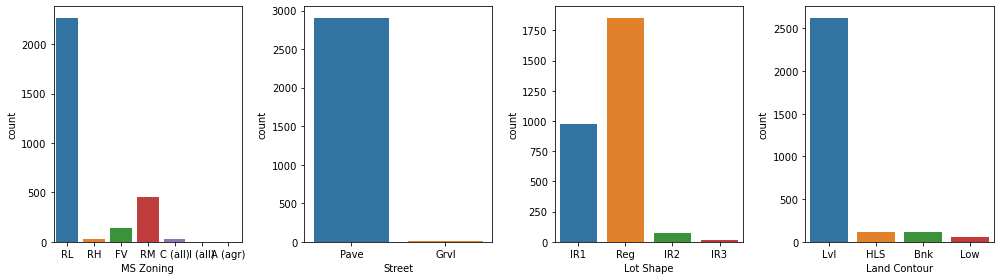

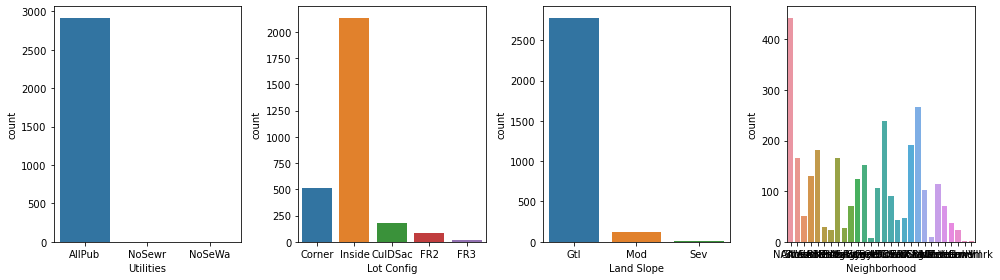

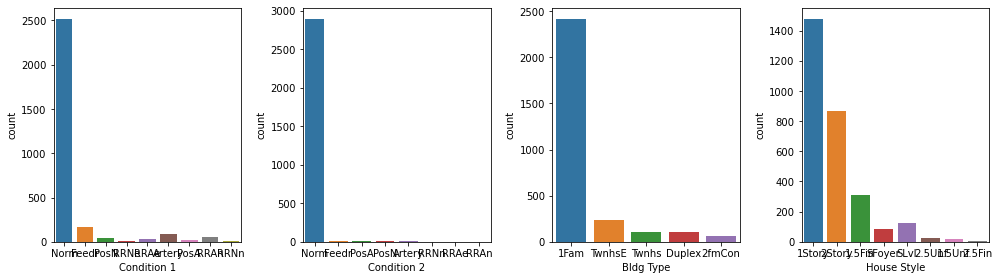

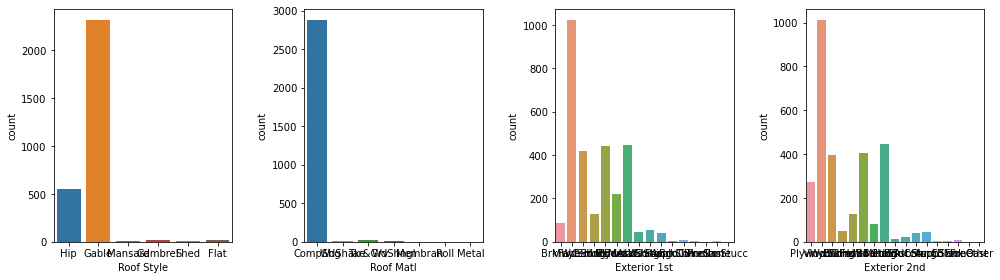

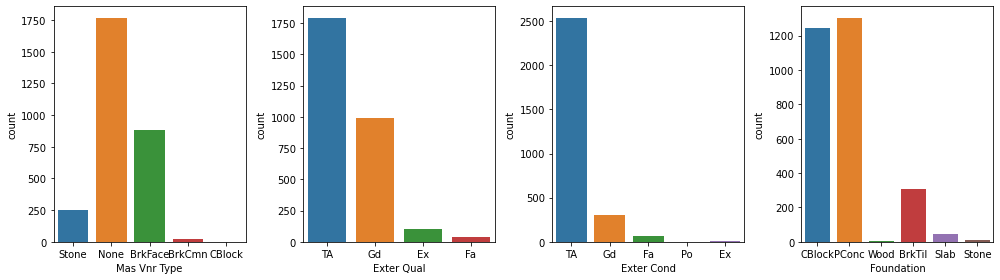

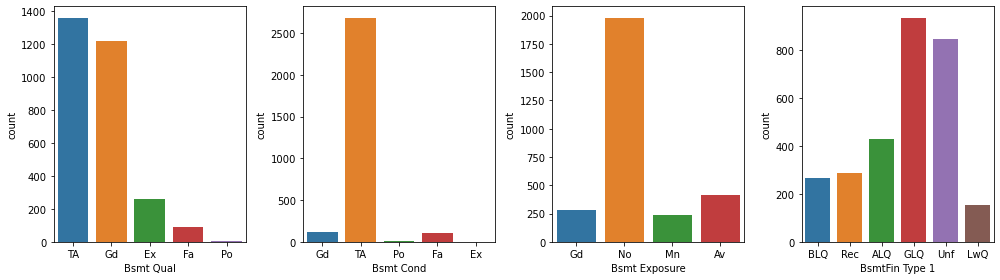

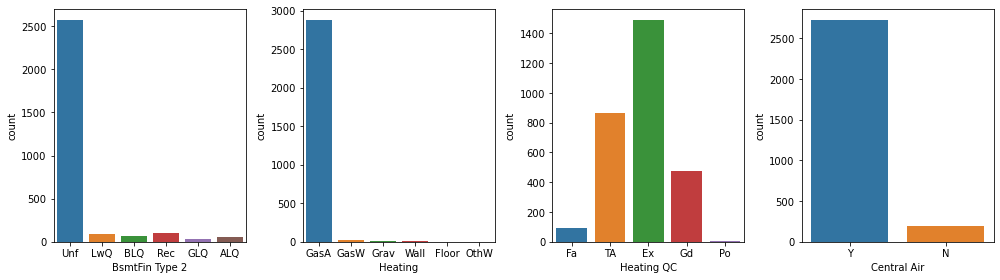

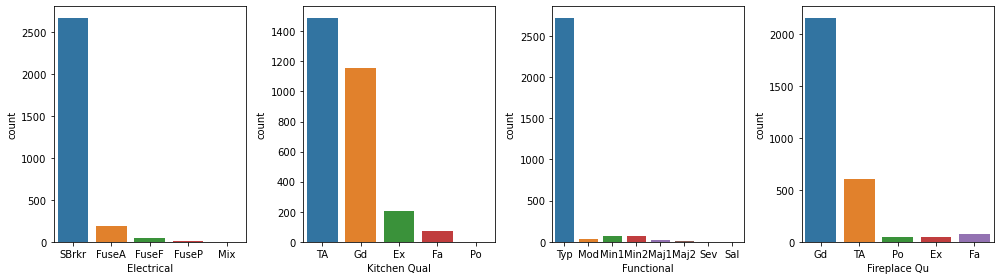

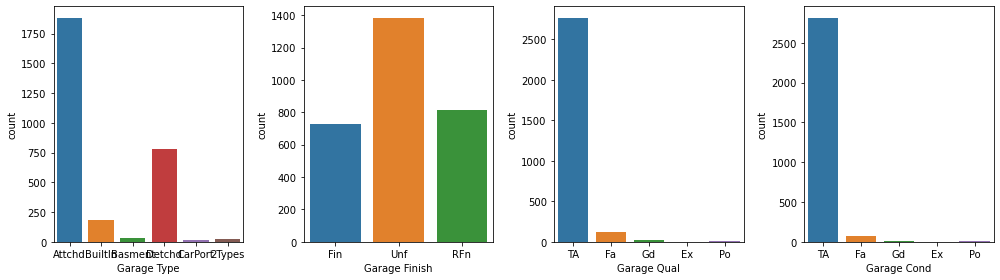

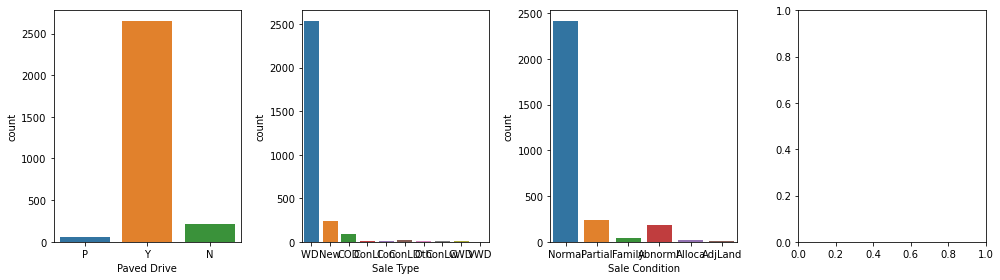

In [243]:
plt.rcParams["figure.figsize"] = [14.00, 4.0]
plt.rcParams["figure.autolayout"] = True

categoricalAttr = ["MS Zoning", "Street", "Lot Shape", "Land Contour", "Utilities", "Lot Config",
                   "Land Slope", "Neighborhood", "Condition 1", "Condition 2", "Bldg Type", "House Style",
                   "Roof Style", "Roof Matl", "Exterior 1st", "Exterior 2nd", "Mas Vnr Type", "Exter Qual",
                   "Exter Cond", "Foundation", "Bsmt Qual", "Bsmt Cond", "Bsmt Exposure", "BsmtFin Type 1",
                   "BsmtFin Type 2", "Heating", "Heating QC", "Central Air", "Electrical", "Kitchen Qual",
                   "Functional", "Fireplace Qu", "Garage Type", "Garage Finish", "Garage Qual", "Garage Cond",
                   "Paved Drive", "Sale Type", "Sale Condition"]

index = 0
graphsInARow = 4

for attr in categoricalAttr:
    
    if (index % graphsInARow == 0):
        f, ax = plt.subplots(1, graphsInARow)
    
    # Using the seaborn countplot for categorical variable
    sns.countplot(x=attr, data=dfCurated, ax = ax[index % graphsInARow])
    index = index + 1
    
    # Shows multiple graohs in a row
    if (index % graphsInARow == 0):
        plt.show()


<h4>4.a.3) Plotting Histogram plots to understand distributions for Continuos variables</h4>

In [ ]:
plt.rcParams["figure.figsize"] = [14.00, 4.0]
plt.rcParams["figure.autolayout"] = True

continuosAttr = ['DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate','Age','DailyRate','TotalWorkingYears',
                 'YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']

index = 0
graphsInARow = 4

# MonthlyIncome MonthlyRate

for attr in continuosAttr:
    if (index % graphsInARow == 0):
        f, ax = plt.subplots(1, graphsInARow)
    sns.histplot(data=dfCurated[attr], bins=10, kde=True, ax = ax[index % graphsInARow])
    index = index + 1
    if (index % graphsInARow == 0):
        plt.show()


<h4>3.b) Feature Engineering Techniques<h4>
<h4>3.b.1) Identifying attributes that can be removed</h4>

For identifying the features that can be removed, let us begin with identifying the unique values in each attribute field.

In [43]:
# Preparing copy of the Dataset
dfProccessed = df1.copy()

# Identifying size of data
dfProccessed.shape

(2930, 82)

<h3>4.	Data Visualization</h3>

<h4>4.a) Data visualizations to get an insight about the dataset</h4>

In [32]:
numericAttr = []
categoricalAttr = []

# Iterating over the attributes to get the type
for attribute in df1.columns:
    if (df1[attribute].dtype == "int64" or df1[attribute].dtype == "float64"):
        numericAttr.append(attribute)
    if (df1[attribute].dtype == "object"):
        categoricalAttr.append(attribute)

print("Type: Categorical / Object")
print("Count:", len(categoricalAttr))
print("Attributes:", ", ".join(categoricalAttr))
print("---------------------------------------------")
print("Type: Continuous /  int64 / float64")
print("Count:", len(numericAttr))
print("Attributes:", ", ".join(numericAttr))
print("---------------------------------------------")


Type: Categorical / Object
Count: 43
Attributes: MS Zoning, Street, Alley, Lot Shape, Land Contour, Utilities, Lot Config, Land Slope, Neighborhood, Condition 1, Condition 2, Bldg Type, House Style, Roof Style, Roof Matl, Exterior 1st, Exterior 2nd, Mas Vnr Type, Exter Qual, Exter Cond, Foundation, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin Type 2, Heating, Heating QC, Central Air, Electrical, Kitchen Qual, Functional, Fireplace Qu, Garage Type, Garage Finish, Garage Qual, Garage Cond, Paved Drive, Pool QC, Fence, Misc Feature, Sale Type, Sale Condition
---------------------------------------------
Type: Continuous /  int64 / float64
Count: 39
Attributes: Order, PID, MS SubClass, Lot Frontage, Lot Area, Overall Qual, Overall Cond, Year Built, Year Remod/Add, Mas Vnr Area, BsmtFin SF 1, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, 1st Flr SF, 2nd Flr SF, Low Qual Fin SF, Gr Liv Area, Bsmt Full Bath, Bsmt Half Bath, Full Bath, Half Bath, Bedroom AbvGr, Kitchen AbvGr, TotRm

<b>Reference:</b>
    <div>[1] https://neptune.ai/blog/how-to-deal-with-imbalanced-classification-and-regression-data</div>

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

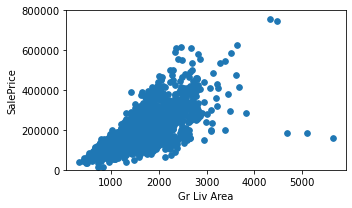

In [18]:
var = 'Gr Liv Area'
data = pd.concat([df1['SalePrice'], df1[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000), s=32)

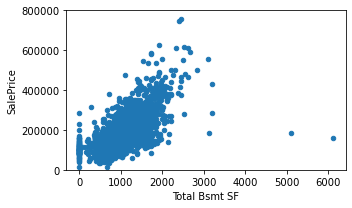

In [21]:
var = 'Total Bsmt SF'
data = pd.concat([df1['SalePrice'], df1[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

(-0.5, 9.5, 0.0, 800000.0)

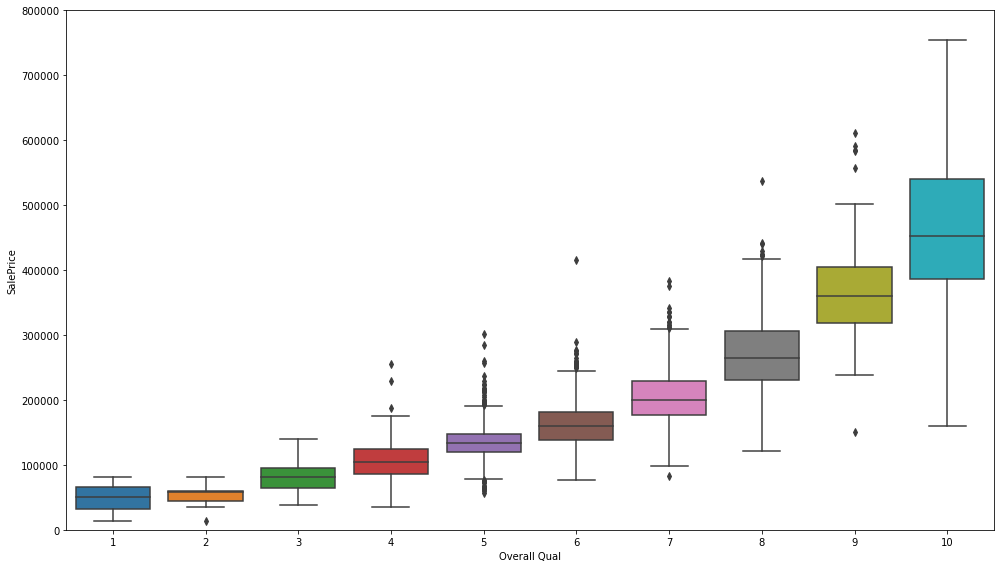

In [22]:
var = 'Overall Qual'
data = pd.concat([df1['SalePrice'], df1[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)

<h4>4.b) Corelation Analysis</h4>

<AxesSubplot:>

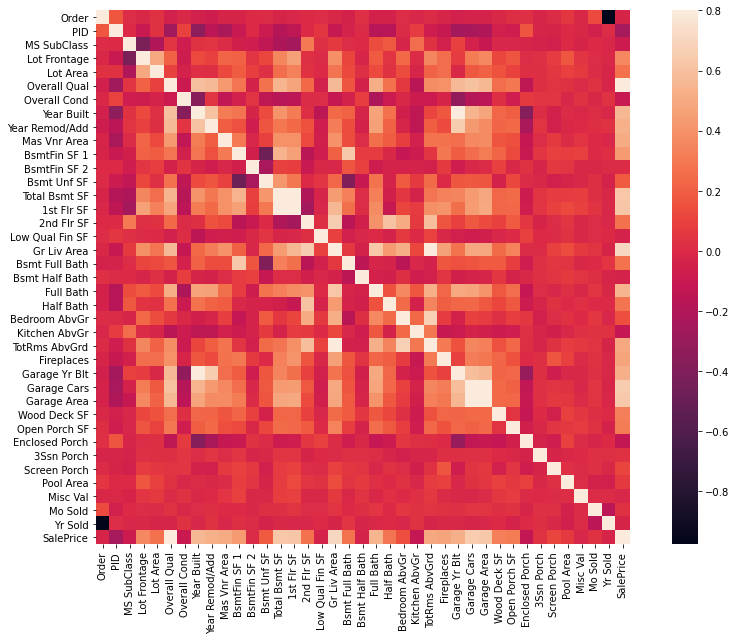

In [23]:
corrmat = df1.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

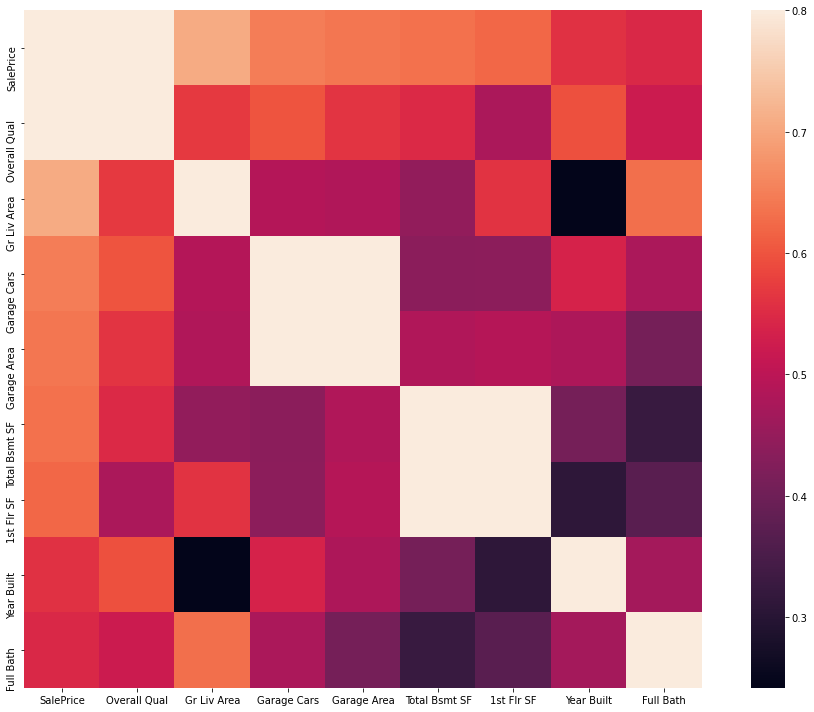

In [24]:
k = 9 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
f, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(df1[cols].corr(), vmax=.8, square=True);

C:\Users\USER\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


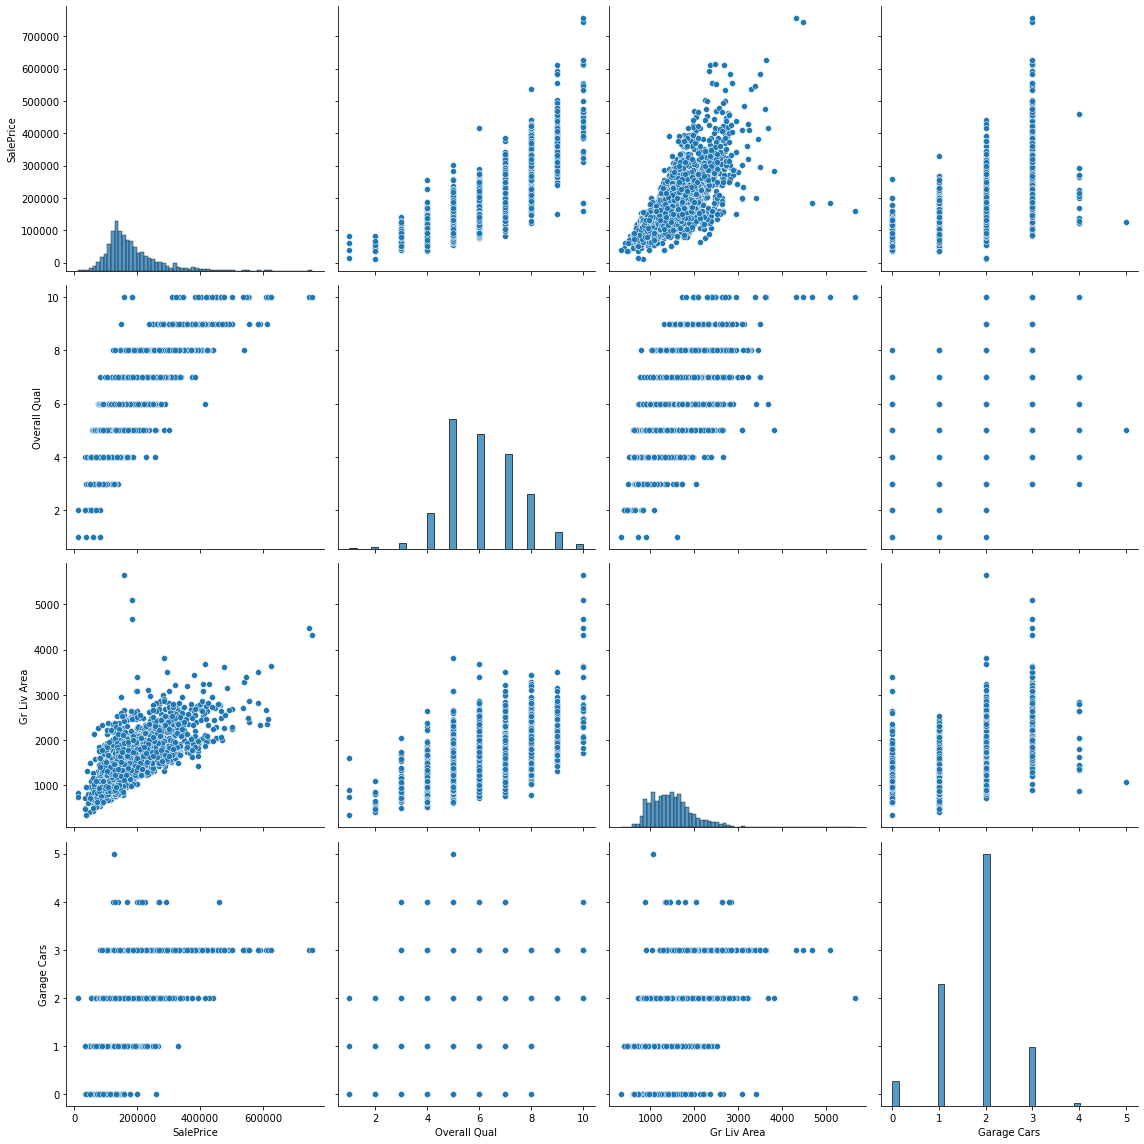

In [26]:
cols = ['SalePrice', 'Overall Qual', 'Gr Liv Area', 'Garage Cars']
sns.pairplot(df1[cols], size = 4);

In [27]:
total = df1.isnull().sum().sort_values(ascending=False)
percent = (df1.isnull().sum()/df1.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Pool QC,2917,0.995563
Misc Feature,2824,0.963823
Alley,2732,0.932423
Fence,2358,0.804778
Fireplace Qu,1422,0.485324
Lot Frontage,490,0.167235
Garage Cond,159,0.054266
Garage Finish,159,0.054266
Garage Yr Blt,159,0.054266
Garage Qual,159,0.054266


Predicting the sale price
Preparing the data
Feature scaling
We will do a little preprocessing to our data using the following formula (standardization):

x′=(x−μ)/σ 

where  μ  is the population mean and  σ  is the standard deviation.

In [29]:
x = df1['Gr Liv Area']
y = df1['SalePrice']

x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x] 

In [30]:
x.shape

(2930, 2)

3.	Data Pre-processing and cleaning [2M]
1.	Do the appropriate pre-processing of the data like identifying NULL or Missing Values if any, handling of outliers if present in the dataset, skewed data etc. Mention the pre-processing steps performed in the markdown cell.  PENDING 
2.	Apply appropriate feature engineering techniques for them. Apply the feature transformation techniques like Standardization, Normalization, etc. You are free to apply the appropriate transformations depending upon the structure and the complexity of your dataset. Provide proper justification. Techniques used without justification will not be awarded marks PENDING 
 
4.	Model Building [3M]
1.	Split the dataset into training and test sets. Justify your choice of split. Answer without justification will not be awarded marks. [1 M] PENDING
2.	Build Model Development using Linear Regression and Plot the train and test loss.  [1M] PENDING
3.	Explore the need of regularization and incorporate few relevant techniques for
the problem statements. Compare models with and without regularization in a tabular format and justify the findings. [1 M] PENDING

5.	 Performance Evaluation [2 M]
1.	Do the prediction for the test data and display the results for the inference. Calculate all the evaluation metrics and print mean square error and R^2 error. [1M]  PENDING
2.	Print best Co-efficient and Intercept for linear regression model [1M] PENDING
